### CNN and RNN
## Karan Pillay

# Part 1

### Loading the dataset

In [1]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
import pandas as pd
from keras.datasets import fashion_mnist
import keras
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

### Analyze the data

In [3]:

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

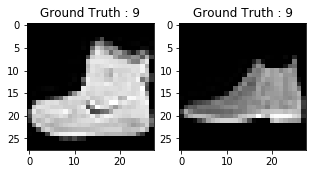

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

### Data pre-processing 

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### Modeling the data 

In [11]:
batch_size = 64
epochs = 15
num_classes = 10

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Compiling the model

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
# Train the Model
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [16]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 111s 2ms/step - loss: 0.4605 - accuracy: 0.8307 - val_loss: 0.3366 - val_accuracy: 0.8777
Epoch 2/15
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2897 - accuracy: 0.8936 - val_loss: 0.3078 - val_accuracy: 0.8852
Epoch 3/15
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2430 - accuracy: 0.9093 - val_loss: 0.2580 - val_accuracy: 0.9057
Epoch 4/15
48000/48000 [==============================] - 116s 2ms/step - loss: 0.2106 - accuracy: 0.9224 - val_loss: 0.2443 - val_accuracy: 0.9109
Epoch 5/15
48000/48000 [==============================] - 109s 2ms/step - loss: 0.1858 - accuracy: 0.9305 - val_loss: 0.2470 - val_accuracy: 0.9115
Epoch 6/15
48000/48000 [==============================] - 110s 2ms/step - loss: 0.1611 - accuracy: 0.9405 - val_loss: 0.2349 - val_accuracy: 0.9203
Epoch 7/15
48000/48000 [==============================] - 115s

### Model Evaluation on the Test Set

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.40563538425099105
Test accuracy: 0.9182000160217285


***From the below two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much. <br>***

***The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.<br>***

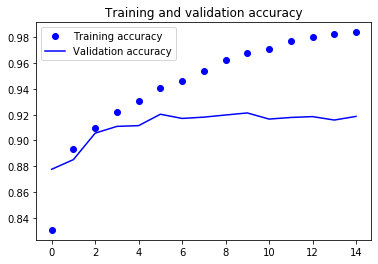

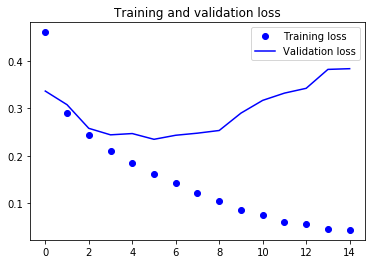

In [19]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Adding a dropout layer to overcome the problem of overfitting.


In [20]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [21]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [22]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [23]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=15,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 132s 3ms/step - loss: 0.5897 - accuracy: 0.7823 - val_loss: 0.3593 - val_accuracy: 0.8702
Epoch 2/15
48000/48000 [==============================] - 128s 3ms/step - loss: 0.3714 - accuracy: 0.8638 - val_loss: 0.3052 - val_accuracy: 0.8887
Epoch 3/15
48000/48000 [==============================] - 127s 3ms/step - loss: 0.3249 - accuracy: 0.8809 - val_loss: 0.2743 - val_accuracy: 0.8982
Epoch 4/15
48000/48000 [==============================] - 129s 3ms/step - loss: 0.2988 - accuracy: 0.8915 - val_loss: 0.2589 - val_accuracy: 0.9042
Epoch 5/15
48000/48000 [==============================] - 135s 3ms/step - loss: 0.2822 - accuracy: 0.8956 - val_loss: 0.2558 - val_accuracy: 0.9042
Epoch 6/15
48000/48000 [==============================] - 128s 3ms/step - loss: 0.2670 - accuracy: 0.9011 - val_loss: 0.2366 - val_accuracy: 0.9147
Epoch 7/15
48000/48000 [==============================] - 128s

**On adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.**

In [24]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.40563538425099105
Test accuracy: 0.9182000160217285


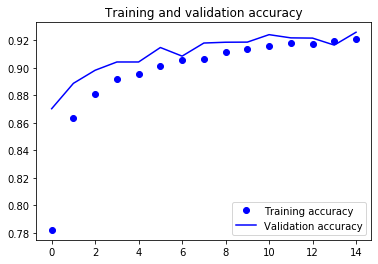

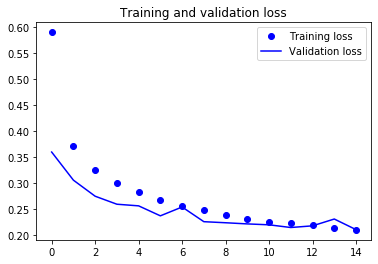

In [25]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.**

In [26]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape, test_Y.shape)

(10000,) (10000,)


Found 9135 correct labels


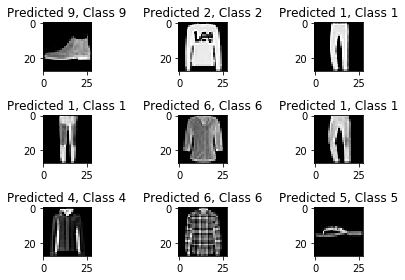

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 865 incorrect labels


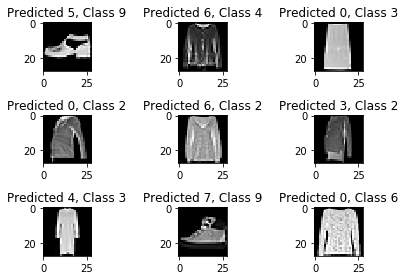

In [28]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [29]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.93      0.81      0.87      1000
     Class 3       0.91      0.92      0.92      1000
     Class 4       0.87      0.87      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.76      0.76      1000
     Class 7       0.94      0.99      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



**The classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.**


In [30]:
from sklearn.metrics import confusion_matrix

label = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
confusion_matrix= pd.DataFrame(confusion_matrix(test_Y, predicted_classes), columns = label, index = label)
confusion_matrix

,top,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,ankle boot
top,880,0,6,15,1,1,89,0,8,0
trouser,3,984,0,8,2,0,1,0,2,0
pullover,67,1,811,6,52,0,63,0,0,0
dress,33,2,6,924,10,0,25,0,0,0
coat,23,0,23,30,872,0,52,0,0,0
sandal,1,0,0,0,0,973,0,21,0,5
shirt,123,0,28,25,62,0,757,0,5,0
sneaker,0,0,0,0,0,1,0,988,0,11
bag,6,1,0,4,0,1,1,0,987,0
ankle boot,1,0,0,0,0,3,0,37,0,959


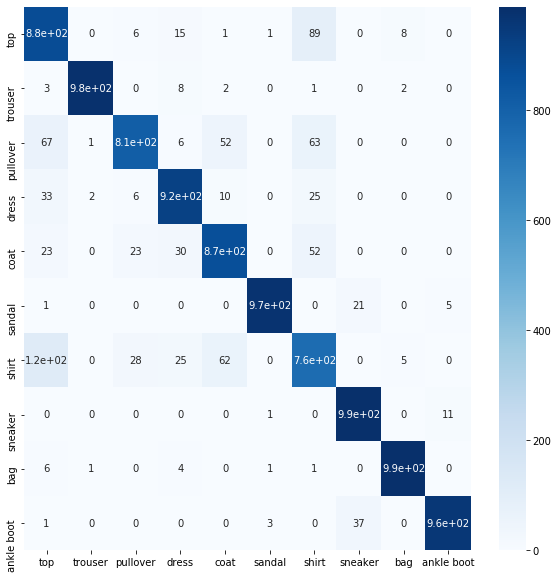

In [31]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize = (10,10))
sn.heatmap(confusion_matrix, annot=True, cmap='Blues')

# Part 2

In [95]:
#importing the datasets
import pandas as pd
mydata = pd.read_csv('admData20.csv')
mydata.head(n = 10)

,ExpStartDate,AdmittedNum,AppliedNum,WeeksBeforeStart,Budget
0,10/29/2018,3,61,10,87
1,10/29/2018,7,84,9,87
2,10/29/2018,10,90,8,87
3,10/29/2018,24,118,7,87
4,10/29/2018,39,132,6,87
5,10/29/2018,54,131,5,87
6,10/29/2018,66,138,4,87
7,10/29/2018,77,126,3,87
8,10/29/2018,83,117,2,87
9,1/21/2019,0,7,19,150


### Part A:  Create a Recurrent Neural Network model. Explore both GRU and LSTM layers.

In [96]:
new = mydata

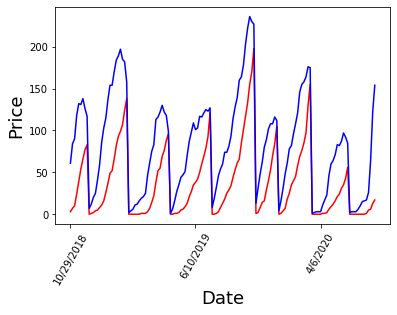

In [97]:
plt.plot(range(new.shape[0]), (new['AdmittedNum']), color = 'r')
plt.plot(range(new.shape[0]), (new['AppliedNum']), color = 'b')
plt.xticks(range(0, new.shape[0], 60), new['ExpStartDate'].loc[::60], rotation = 60)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

In [98]:
addmit = new.loc[:,'AdmittedNum'].values
addmit[:10]

array([ 3,  7, 10, 24, 39, 54, 66, 77, 83,  0], dtype=int64)

In [99]:
trainPortion = round(addmit.shape[0]*0.7)
valPortion = round(addmit.shape[0]*0.15)
trainData = addmit[:trainPortion]
valData = addmit[trainPortion:trainPortion+valPortion]
testData = addmit[trainPortion+valPortion:]

In [100]:
trainData.shape, testData.shape

((103,), (22,))

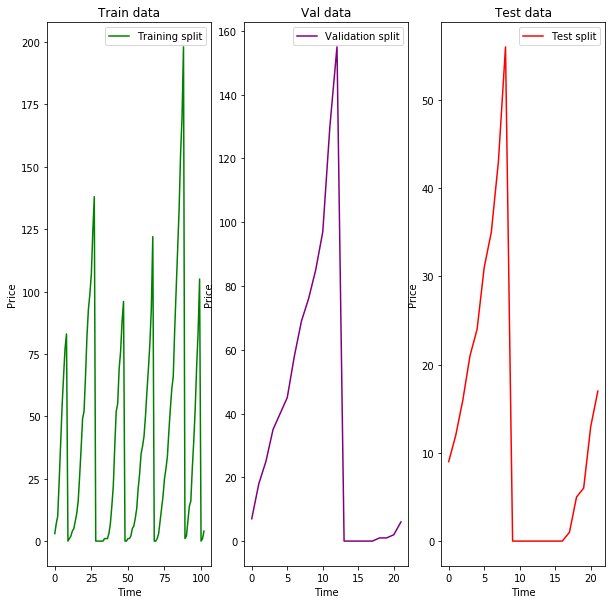

In [101]:
#subplot with training data
plt.figure(figsize=[10,10])

#subplot with training data
plt.subplot(1,3,1)
plt.plot(range(trainData.shape[0]), trainData, color = 'green', label = 'Training split')
plt.title('Train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(valData.shape[0]), valData, color = 'purple', label = 'Validation split')
plt.title('Val data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(testData.shape[0]), testData, color = 'red', label = 'Test split')
plt.title('Test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [102]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
print(trainData.shape)
trainData = trainData.reshape(-1,1)
print(trainData.shape)

(103,)
(103, 1)


In [103]:
valData = valData.reshape(-1,1)
testData = testData.reshape(-1,1)

In [104]:
sc.fit(trainData)
trainNorm = sc.transform(trainData)
valNorm = sc.transform(valData)
testNorm = sc.transform(testData)

In [105]:
trainNorm.shape, testNorm.shape

((103, 1), (22, 1))

In [106]:
#create sequece
def createSeq(dataset, look_back = 6, foresight = 2):
    X,Y = [],[]
    for i in range(len(dataset)-look_back-foresight):
        obs = dataset[i:(i+look_back),0]
        X.append(obs)
        Y.append(dataset[i+(look_back+foresight),0])
    return np.array(X), np.array(Y)

In [107]:
#Sequences
trainNormX, trainNormY = createSeq(trainNorm, look_back = 6, foresight = 2)

In [108]:
valNormX, valNormY = createSeq(valNorm, look_back = 6, foresight = 2)
testNormX, testNormY = createSeq(testNorm, look_back = 6, foresight = 2)

In [109]:
print(trainNormX.shape,valNormX.shape,testNormX.shape)

(95, 6) (14, 6) (14, 6)


In [110]:
#Reshape for Keras layers
#3d tensor of (nb_samples, look_back, num_features)
trainNormX = np.reshape(trainNormX, (trainNormX.shape[0], trainNormX.shape[1],1))
valNormX = np.reshape(valNormX, (valNormX.shape[0], valNormX.shape[1],1))
testNormX = np.reshape(testNormX, (testNormX.shape[0], testNormX.shape[1],1))
print(trainNormX.shape,valNormX.shape,testNormX.shape)

(95, 6, 1) (14, 6, 1) (14, 6, 1)


In [111]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.layers import Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [112]:
model = Sequential()
model.add(LSTM(32, input_shape=(6,1), dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### LSTM model

In [113]:
network_name='lstm'
filepath = network_name+ "_epoch-{epoch:02d}-loss-{loss:0.4f}-.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'loss', verbose=0, save_best_only=True, mode = 'min')
callbacks_list = [checkpoint]
network = model.fit(trainNormX, trainNormY, validation_data =(valNormX, valNormY), epochs = 10, batch_size=64,
                   callbacks = callbacks_list)

Train on 95 samples, validate on 14 samples
Epoch 1/10
95/95 [==============================] - 1s 10ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - val_loss: 0.2018 - val_mean_absolute_error: 0.2018
Epoch 2/10
95/95 [==============================] - 0s 167us/step - loss: 0.1986 - mean_absolute_error: 0.1986 - val_loss: 0.2072 - val_mean_absolute_error: 0.2072
Epoch 3/10
95/95 [==============================] - 0s 129us/step - loss: 0.1957 - mean_absolute_error: 0.1957 - val_loss: 0.2121 - val_mean_absolute_error: 0.2121
Epoch 4/10
95/95 [==============================] - 0s 137us/step - loss: 0.1926 - mean_absolute_error: 0.1926 - val_loss: 0.2159 - val_mean_absolute_error: 0.2159
Epoch 5/10
95/95 [==============================] - 0s 139us/step - loss: 0.1924 - mean_absolute_error: 0.1924 - val_loss: 0.2191 - val_mean_absolute_error: 0.2191
Epoch 6/10
95/95 [==============================] - 0s 167us/step - loss: 0.1914 - mean_absolute_error: 0.1914 - val_loss: 0.2213 - val_m

In [114]:
print('Min is ',min(np.array(network.history['mean_absolute_error'])), 'at the index', np.array(network.history['mean_absolute_error']).argmin())

Min is  0.18349418 at the index 9


In [115]:
score1 = model.evaluate(testNormX,testNormY)
print(model.metrics_names[1],'on test is',score1[1])

14/14 [==============================] - 0s 81us/step
mean_absolute_error on test is 0.08871124684810638


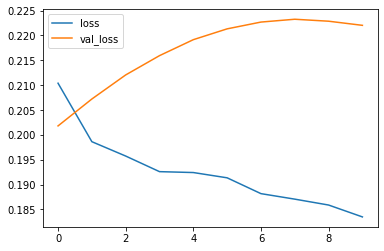

In [116]:
#Error plot for simple LSTM
plt.plot(network.history['loss'], label = 'loss')
plt.plot(network.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### GRU model

In [117]:
network_name_g='GRU'
filepath_g = network_name_g+ "_epoch-{epoch:02d}-loss-{loss:0.4f}-.hdf5"
checkpoint_g = ModelCheckpoint(filepath_g, monitor = 'loss', verbose=0, save_best_only=True, mode = 'min')
callbacks_list_g = [checkpoint_g]
network = model.fit(trainNormX, trainNormY, validation_data =(valNormX, valNormY), epochs = 10, batch_size=64,
                   callbacks = callbacks_list_g)

Train on 95 samples, validate on 14 samples
Epoch 1/10
95/95 [==============================] - 0s 134us/step - loss: 0.1819 - mean_absolute_error: 0.1819 - val_loss: 0.2208 - val_mean_absolute_error: 0.2208
Epoch 2/10
95/95 [==============================] - 0s 114us/step - loss: 0.1800 - mean_absolute_error: 0.1800 - val_loss: 0.2190 - val_mean_absolute_error: 0.2190
Epoch 3/10
95/95 [==============================] - 0s 163us/step - loss: 0.1780 - mean_absolute_error: 0.1780 - val_loss: 0.2174 - val_mean_absolute_error: 0.2174
Epoch 4/10
95/95 [==============================] - 0s 145us/step - loss: 0.1768 - mean_absolute_error: 0.1768 - val_loss: 0.2160 - val_mean_absolute_error: 0.2160
Epoch 5/10
95/95 [==============================] - 0s 141us/step - loss: 0.1750 - mean_absolute_error: 0.1750 - val_loss: 0.2142 - val_mean_absolute_error: 0.2142
Epoch 6/10
95/95 [==============================] - 0s 146us/step - loss: 0.1739 - mean_absolute_error: 0.1739 - val_loss: 0.2122 - val_

In [118]:
print('Min is ',min(np.array(network.history['mean_absolute_error'])), 'at the index', np.array(network.history['mean_absolute_error']).argmin())

Min is  0.17051154 at the index 8


In [119]:
score2 = model.evaluate(testNormX,testNormY)
print(model.metrics_names[1],'on test is',score2[1])

14/14 [==============================] - 0s 163us/step
mean_absolute_error on test is 0.12733416259288788


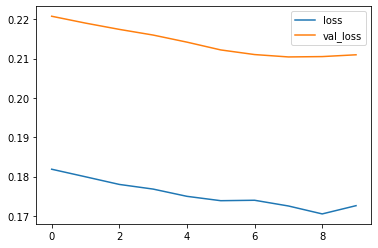

In [120]:
#Error plot for simple LSTM
plt.plot(network.history['loss'], label = 'loss')
plt.plot(network.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Part B: 1d Convolutional Neural Network

In [121]:
#Building the CNN model
model1 = models.Sequential()
model1.add(layers.Conv1D(filters = 32, kernel_size = 6, activation = 'relu', input_shape = (6,1)))
model1.add(layers.Conv1D(filters = 64, kernel_size = 1, activation = 'relu'))
#model.add(layers.MaxPool1D(pool_size = 2))
#model.add(layers.Conv1D(filters = 64, kernel_size = 1, activation = 'relu'))
#model.add(layers.MaxPool1D(pool_size = 2))
#Flatten 3D outputs to 1D and add Dense layer 
model1.add(layers.Flatten())
#model.add(layers.Dense(units=64, activation = 'relu'))
model1.add(layers.Dense(units=1, activation = 'linear'))

In [122]:
model1.compile(loss='mae', optimizer = 'adam', metrics = ['mean_absolute_error'])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 32)             224       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 64)             2112      
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [123]:
#Fit simple LSTM
network_name_lstm='lstm'
filepath_1 = network_name_lstm+ "_epoch-{epoch:02d}-loss-{loss:0.4f}-.hdf5"
checkpoint_1 = ModelCheckpoint(filepath_1, monitor = 'loss', verbose=0, save_best_only=True, mode = 'min')
callbacks_list_1 = [checkpoint_1]
network_1 = model1.fit(trainNormX, trainNormY, validation_data =(valNormX, valNormY), epochs = 10, batch_size=64,
                   callbacks = callbacks_list_1)

Train on 95 samples, validate on 14 samples
Epoch 1/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - val_loss: 0.2103 - val_mean_absolute_error: 0.2103
Epoch 2/10
95/95 [==============================] - 0s 71us/step - loss: 0.1988 - mean_absolute_error: 0.1988 - val_loss: 0.2100 - val_mean_absolute_error: 0.2100
Epoch 3/10
95/95 [==============================] - 0s 138us/step - loss: 0.1941 - mean_absolute_error: 0.1941 - val_loss: 0.2082 - val_mean_absolute_error: 0.2082
Epoch 4/10
95/95 [==============================] - 0s 84us/step - loss: 0.1896 - mean_absolute_error: 0.1896 - val_loss: 0.2072 - val_mean_absolute_error: 0.2072
Epoch 5/10
95/95 [==============================] - 0s 110us/step - loss: 0.1855 - mean_absolute_error: 0.1855 - val_loss: 0.2064 - val_mean_absolute_error: 0.2064
Epoch 6/10
95/95 [==============================] - 0s 89us/step - loss: 0.1814 - mean_absolute_error: 0.1814 - val_loss: 0.2063 - val_mean_

In [124]:
print('Min is ',min(np.array(network_1.history['mean_absolute_error'])), 'at the index', np.array(network_1.history['mean_absolute_error']).argmin())

Min is  0.16398397 at the index 9


In [125]:
score3 = model1.evaluate(testNormX,testNormY)
print(model1.metrics_names[1],'on test is',score3[1])

14/14 [==============================] - 0s 288us/step
mean_absolute_error on test is 0.09469883888959885


In [126]:
network_name_gru='GRU'
filepath_2 = network_name_gru+ "_epoch-{epoch:02d}-loss-{loss:0.4f}-.hdf5"
checkpoint_2 = ModelCheckpoint(filepath_2, monitor = 'loss', verbose=0, save_best_only=True, mode = 'min')
callbacks_list_2 = [checkpoint_2]
network_2 = model1.fit(trainNormX, trainNormY, validation_data =(valNormX, valNormY), epochs = 10, batch_size=64,
                   callbacks = callbacks_list)

Train on 95 samples, validate on 14 samples
Epoch 1/10
95/95 [==============================] - 0s 241us/step - loss: 0.1598 - mean_absolute_error: 0.1598 - val_loss: 0.1966 - val_mean_absolute_error: 0.1966
Epoch 2/10
95/95 [==============================] - 0s 111us/step - loss: 0.1570 - mean_absolute_error: 0.1570 - val_loss: 0.1919 - val_mean_absolute_error: 0.1919
Epoch 3/10
95/95 [==============================] - 0s 69us/step - loss: 0.1533 - mean_absolute_error: 0.1533 - val_loss: 0.1894 - val_mean_absolute_error: 0.1894
Epoch 4/10
95/95 [==============================] - 0s 112us/step - loss: 0.1507 - mean_absolute_error: 0.1507 - val_loss: 0.1875 - val_mean_absolute_error: 0.1875
Epoch 5/10
95/95 [==============================] - 0s 122us/step - loss: 0.1490 - mean_absolute_error: 0.1490 - val_loss: 0.1848 - val_mean_absolute_error: 0.1848
Epoch 6/10
95/95 [==============================] - 0s 84us/step - loss: 0.1476 - mean_absolute_error: 0.1476 - val_loss: 0.1822 - val_me

In [127]:
print('Min is ',min(np.array(network_2.history['mean_absolute_error'])), 'at the index', np.array(network_2.history['mean_absolute_error']).argmin())

Min is  0.14327489 at the index 9


In [128]:
score4 = model1.evaluate(testNormX,testNormY)
print(model1.metrics_names[1],'on test is',score4[1])

14/14 [==============================] - 0s 0us/step
mean_absolute_error on test is 0.13935942947864532


### Part C: Regular Deep Neural Network 

In [129]:
from keras.models import Sequential
from keras.layers import Dense

In [130]:
trainNormX = np.reshape(trainNormX, (trainNormX.shape[0], trainNormX.shape[1]))
valNormX = np.reshape(valNormX, (valNormX.shape[0], valNormX.shape[1]))
testNormX = np.reshape(testNormX, (testNormX.shape[0], testNormX.shape[1]))
print(trainNormX.shape,valNormX.shape,testNormX.shape)

(95, 6) (14, 6) (14, 6)


In [131]:
modeld = Sequential()
modeld.add(Dense(128, input_shape=(6,), activation = 'relu'))
modeld.add(Dropout(0.1))
modeld.add(Dense(64, activation='relu'))
modeld.add(Dropout(0.2))
modeld.add(Dense(64, activation = 'relu'))
modeld.add(Dense(1, activation = 'linear'))
modeld.compile(optimizer='adam', loss='mae', metrics=['mean_absolute_error'])
modeld.summary()
network_d = modeld.fit(trainNormX, trainNormY, validation_data=(valNormX, valNormY), epochs=100, batch_size=32, verbose=0)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 13,377
Trainable params: 13,377
Non-trainable params: 0
__________________________________________________

In [132]:
from sklearn.metrics import mean_absolute_error
pred_d = modeld.predict(testNormX)
mae = mean_absolute_error(testNormY, pred_d)
print('DNN_Mean_Absolute_Error:', mae)

DNN_Mean_Absolute_Error: 0.1003088297437968


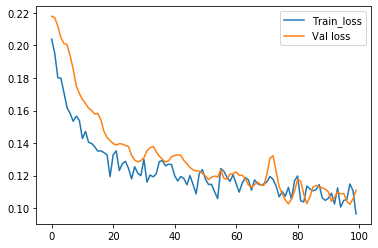

In [133]:
plt.plot(network_d.history['loss'], label = 'Train_loss')
plt.plot(network_d.history['val_loss'], label = 'Val loss')
plt.legend()
plt.show()

### Part D: Comments on the performance of the models.

***From all of the above models we got the lowest MAE for LSTM model i.e mean_absolute_error on test is 0.08871124684810638, therefore this is the best model.***  